In [1]:
from model import Net
from utils import ModelHelper
from torchvision import datasets, transforms
import torch.optim as optim
import torch.nn.functional as F
import torch

In [2]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1), # Apply center crop of 22 pixels with a probability of 0.1
    transforms.Resize((28, 28)), # Resize the image to 28
    transforms.RandomRotation((-15., 15.), fill=0), # Random rotations between -15 deg to 15 deg and filling of other area with 0 (black)
    transforms.ToTensor(), # convert to Tensor
    transforms.Normalize((0.1307,), (0.3081,)), # Normalize to mean 0.1307 and deviation 0.3081
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(), # convert to Tensor
    transforms.Normalize((0.1307,), (0.3081,)) # Normalise to mean 0.1307 and std 0.3081
    ])

# Download train and test datasets
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms) # Fix test data

batch_size = 512 # Batch Size

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}
# pin_memory pins the memory in CPU Ram before sending it to the GPU, helps with reducing CPU to CPU transfers

# Load the dataloaders
test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

torch.Size([512, 1, 28, 28])

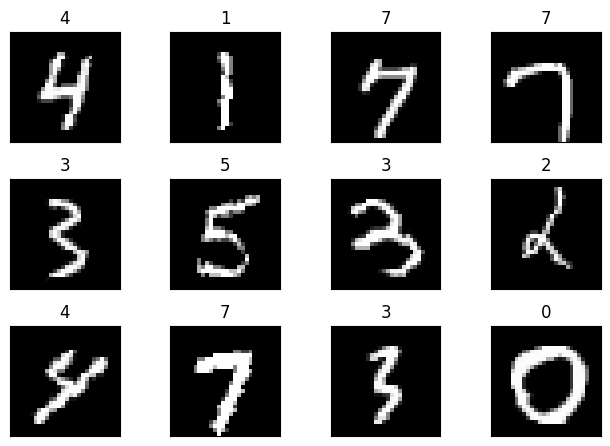

In [3]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader)) # load the train loader and get the next data

fig = plt.figure() # initialize the plt figure object

for i in range(12): # run for 12 steps
  plt.subplot(3,4,i+1) # Create a subplot with 3x4 grid and selecting which subplot to work on right now
  plt.tight_layout() # plt inner function to use tighter layout for minimized layouts
  plt.imshow(batch_data[i].squeeze(0), cmap='gray') # Draw the images and remove the dim with size = 1 , with a color map of gray
  plt.title(batch_label[i].item()) # print the titles with the image labels
  plt.xticks([])
  plt.yticks([])

batch_data.shape

In [4]:
model = Net()
import torch 
# Mac device has 'mps' as GPU 
mh = ModelHelper(model=model,device='mps', train_loader=train_loader, test_loader=test_loader)

In [6]:
mh.get_summary(input_size=(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             288
            Conv2d-2           [-1, 64, 24, 24]          18,432
            Conv2d-3          [-1, 128, 10, 10]          73,728
            Conv2d-4            [-1, 256, 8, 8]         294,912
            Linear-5                   [-1, 50]         204,800
            Linear-6                   [-1, 10]             500
Total params: 592,660
Trainable params: 592,660
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.93
----------------------------------------------------------------


In [8]:
optimizer = optim.SGD(mh.model.to(mh.device).parameters(), lr=0.1, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20
mh.train(optimizer, scheduler, criterion, num_epochs)

Epoch 1


Train: Loss=0.0647 Batch_id=117 Accuracy=93.81: 100%|██████████| 118/118 [00:14<00:00,  8.07it/s]


Test set: Average loss: 0.0865, Accuracy: 9733/10000 (97.33%)

Epoch 2


Train: Loss=0.0953 Batch_id=117 Accuracy=96.23: 100%|██████████| 118/118 [00:13<00:00,  8.45it/s]


Test set: Average loss: 0.0697, Accuracy: 9779/10000 (97.79%)

Epoch 3


Train: Loss=0.1663 Batch_id=117 Accuracy=96.68: 100%|██████████| 118/118 [00:14<00:00,  8.42it/s]


Test set: Average loss: 0.0949, Accuracy: 9714/10000 (97.14%)

Epoch 4


Train: Loss=0.0534 Batch_id=117 Accuracy=97.20: 100%|██████████| 118/118 [00:13<00:00,  8.48it/s]


Test set: Average loss: 0.0529, Accuracy: 9833/10000 (98.33%)

Epoch 5


Train: Loss=0.0934 Batch_id=117 Accuracy=97.77: 100%|██████████| 118/118 [00:13<00:00,  8.60it/s]


Test set: Average loss: 0.0409, Accuracy: 9873/10000 (98.73%)

Epoch 6


Train: Loss=0.0624 Batch_id=117 Accuracy=97.96: 100%|██████████| 118/118 [00:13<00:00,  8.44it/s]


Test set: Average loss: 0.0463, Accuracy: 9860/10000 (98.60%)

Epoch 7


Train: Loss=0.0477 Batch_id=117 Accuracy=98.08: 100%|██████████| 118/118 [00:13<00:00,  8.49it/s]


Test set: Average loss: 0.0416, Accuracy: 9862/10000 (98.62%)

Epoch 8


Train: Loss=0.0151 Batch_id=117 Accuracy=98.22: 100%|██████████| 118/118 [00:13<00:00,  8.49it/s]


Test set: Average loss: 0.0377, Accuracy: 9877/10000 (98.77%)

Epoch 9


Train: Loss=0.0463 Batch_id=117 Accuracy=98.42: 100%|██████████| 118/118 [00:13<00:00,  8.53it/s]


Test set: Average loss: 0.0368, Accuracy: 9899/10000 (98.99%)

Epoch 10


Train: Loss=0.0726 Batch_id=117 Accuracy=98.44: 100%|██████████| 118/118 [00:13<00:00,  8.49it/s]


Test set: Average loss: 0.0338, Accuracy: 9902/10000 (99.02%)

Epoch 11


Train: Loss=0.0535 Batch_id=117 Accuracy=98.56: 100%|██████████| 118/118 [00:13<00:00,  8.53it/s]


Test set: Average loss: 0.0311, Accuracy: 9902/10000 (99.02%)

Epoch 12


Train: Loss=0.0155 Batch_id=117 Accuracy=98.57: 100%|██████████| 118/118 [00:13<00:00,  8.48it/s]


Test set: Average loss: 0.0309, Accuracy: 9919/10000 (99.19%)

Epoch 13


Train: Loss=0.0824 Batch_id=117 Accuracy=98.73: 100%|██████████| 118/118 [00:13<00:00,  8.46it/s]


Test set: Average loss: 0.0289, Accuracy: 9909/10000 (99.09%)

Epoch 14


Train: Loss=0.0300 Batch_id=117 Accuracy=98.67: 100%|██████████| 118/118 [00:13<00:00,  8.55it/s]


Test set: Average loss: 0.0361, Accuracy: 9890/10000 (98.90%)

Epoch 15


Train: Loss=0.0233 Batch_id=117 Accuracy=98.64: 100%|██████████| 118/118 [00:13<00:00,  8.60it/s]


Test set: Average loss: 0.0285, Accuracy: 9911/10000 (99.11%)

Epoch 16


Train: Loss=0.0483 Batch_id=117 Accuracy=99.03: 100%|██████████| 118/118 [00:13<00:00,  8.52it/s]


Test set: Average loss: 0.0236, Accuracy: 9936/10000 (99.36%)

Epoch 17


Train: Loss=0.0133 Batch_id=117 Accuracy=99.25: 100%|██████████| 118/118 [00:13<00:00,  8.44it/s]


Test set: Average loss: 0.0237, Accuracy: 9935/10000 (99.35%)

Epoch 18


Train: Loss=0.0391 Batch_id=117 Accuracy=99.24: 100%|██████████| 118/118 [00:13<00:00,  8.50it/s]


Test set: Average loss: 0.0233, Accuracy: 9935/10000 (99.35%)

Epoch 19


Train: Loss=0.0346 Batch_id=117 Accuracy=99.24: 100%|██████████| 118/118 [00:13<00:00,  8.45it/s]


Test set: Average loss: 0.0225, Accuracy: 9940/10000 (99.40%)

Epoch 20


Train: Loss=0.0078 Batch_id=117 Accuracy=99.30: 100%|██████████| 118/118 [00:13<00:00,  8.43it/s]


Test set: Average loss: 0.0232, Accuracy: 9929/10000 (99.29%)



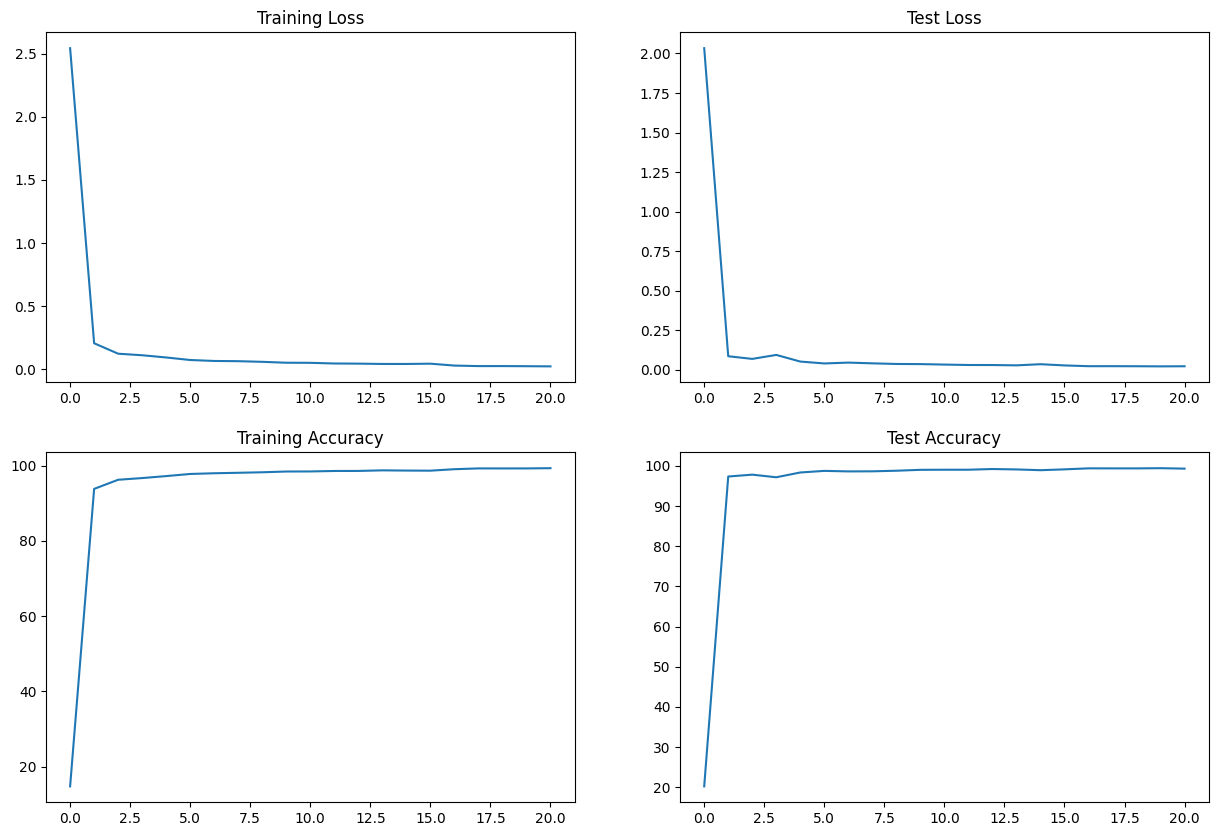

In [9]:
mh.plot()